# Trabajo Práctico n° 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Árboles de Decisión - Regresión

In [2]:
df = pd.read_csv('1000_Companies.csv')

In [3]:
df.head(2)

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


## Análisis Exploratorio

### Distribuciones de las variables

In [4]:
df

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [5]:
df.columns

Index(['RyD_Spend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

In [6]:
df.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


array([[<Axes: title={'center': 'RyD_Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'MarketingSpend'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

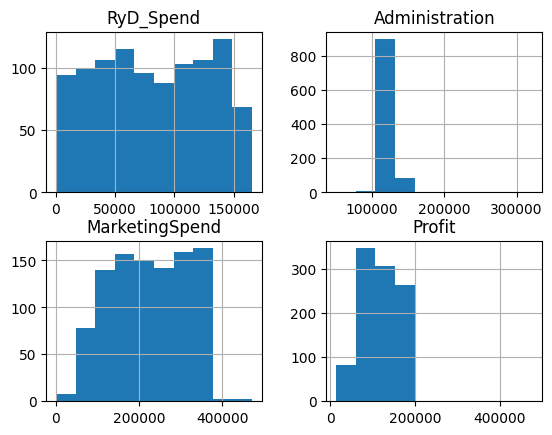

In [7]:
df.hist()

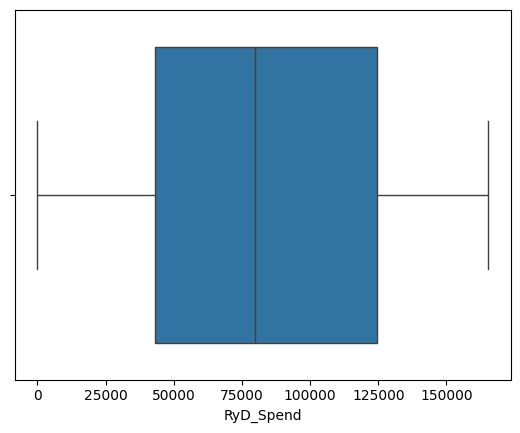

In [8]:
import seaborn as sns

sns.boxplot(data = df, x='RyD_Spend')

plt.show()

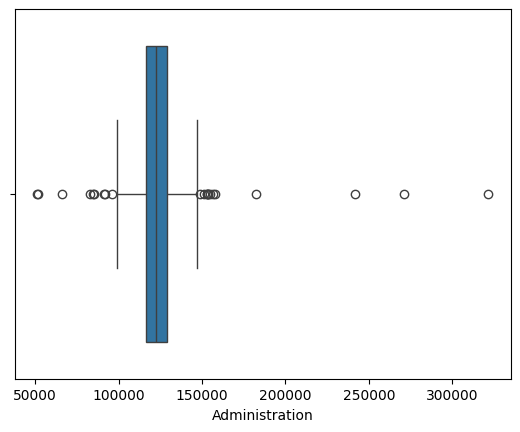

In [9]:
sns.boxplot(data = df, x='Administration')

plt.show()

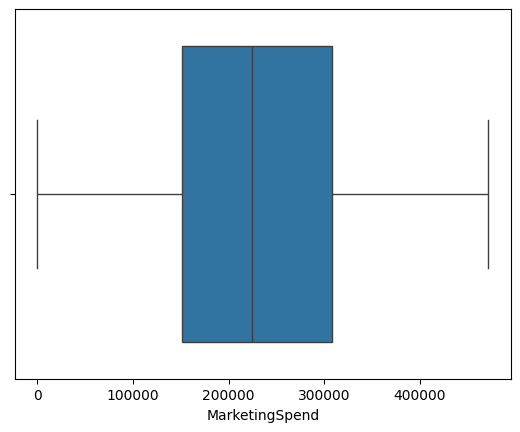

In [10]:
sns.boxplot(data = df, x='MarketingSpend')
plt.show()

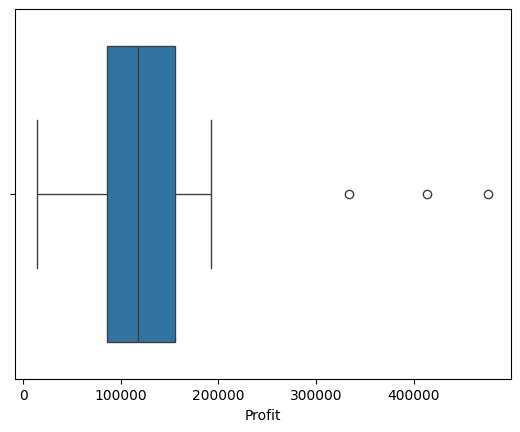

In [11]:
sns.boxplot(data = df, x='Profit')
plt.show()

### Escalado

Debido a la cantidad de valores atípicos se decidió utilizar un escalado robusto el cual es menos sensible a outliers que el escalado estándar.

In [12]:
from sklearn.preprocessing import RobustScaler

escalador = RobustScaler()

arr = escalador.fit_transform(df.drop('State', axis=1))

arr

array([[ 1.0482591 ,  1.15824021,  1.57273795,  1.07160958],
       [ 1.01449049,  2.31676863,  1.39537165,  1.0648633 ],
       [ 0.90211841, -1.70229835,  1.16662251,  1.05421231],
       ...,
       [ 0.24962224,  9.56157435,  0.0166959 ,  4.25532644],
       [ 0.59547907, 15.94044033,  0.36365826,  3.10654288],
       [ 0.99711246, 11.88294933,  0.45111425,  5.15329341]])

In [13]:
df_escalado = pd.DataFrame(arr)

df_escalado.columns = df.drop('State', axis=1).columns

df_escalado

,RyD_Spend,Administration,MarketingSpend,Profit
0,1.048259,1.158240,1.572738,1.071610
1,1.014490,2.316769,1.395372,1.064863
2,0.902118,-1.702298,1.166623,1.054212
3,0.790815,-0.300019,1.009296,0.937195
4,0.763016,-2.482699,0.900969,0.697167
...,...,...,...,...
995,-0.316651,-0.317609,-0.326200,-0.321130
996,0.675421,0.637557,0.665857,0.670580
997,0.249622,9.561574,0.016696,4.255326
998,0.595479,15.940440,0.363658,3.106543


In [14]:
df_escalado['State'] = df['State']

df_escalado

,RyD_Spend,Administration,MarketingSpend,Profit,State
0,1.048259,1.158240,1.572738,1.071610,New York
1,1.014490,2.316769,1.395372,1.064863,California
2,0.902118,-1.702298,1.166623,1.054212,Florida
3,0.790815,-0.300019,1.009296,0.937195,New York
4,0.763016,-2.482699,0.900969,0.697167,Florida
...,...,...,...,...,...
995,-0.316651,-0.317609,-0.326200,-0.321130,California
996,0.675421,0.637557,0.665857,0.670580,California
997,0.249622,9.561574,0.016696,4.255326,California
998,0.595479,15.940440,0.363658,3.106543,California


### Tipos de Datos

In [15]:
df_escalado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   Profit          1000 non-null   float64
 4   State           1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


### Análisis de Valores Faltantes

En nuestro dataset no encontramos valores nulos.

In [16]:
df_escalado.isnull().sum()

RyD_Spend         0
Administration    0
MarketingSpend    0
Profit            0
State             0
dtype: int64

## División del conjunto de datos

In [17]:
#Tokenización de variable categórica
# Usar get_dummies para realizar la codificación one-hot
one_hot_df = pd.get_dummies(df_escalado, columns=['State'])

one_hot_df

,RyD_Spend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_New York
0,1.048259,1.158240,1.572738,1.071610,False,False,True
1,1.014490,2.316769,1.395372,1.064863,True,False,False
2,0.902118,-1.702298,1.166623,1.054212,False,True,False
3,0.790815,-0.300019,1.009296,0.937195,False,False,True
4,0.763016,-2.482699,0.900969,0.697167,False,True,False
...,...,...,...,...,...,...,...
995,-0.316651,-0.317609,-0.326200,-0.321130,True,False,False
996,0.675421,0.637557,0.665857,0.670580,True,False,False
997,0.249622,9.561574,0.016696,4.255326,True,False,False
998,0.595479,15.940440,0.363658,3.106543,True,False,False


In [18]:
X = one_hot_df.drop(['Profit'], axis=1)
y = one_hot_df.Profit

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Dividir el conjunto de datos en entrenamiento + validación y prueba
train_df, test_val_df = train_test_split(one_hot_df, test_size=0.3, random_state=42)

# Dividir el conjunto de entrenamiento + validación en entrenamiento y validación
val_df, test_df = train_test_split(test_val_df, test_size=0.25, random_state=42)

In [21]:
X_train = train_df.drop(['Profit'],axis=1)
y_train = train_df.Profit

X_val = val_df.drop(['Profit'], axis = 1)
y_val = val_df.Profit

X_test = test_df.drop(['Profit'], axis=1)
y_test = test_df.Profit

## Modelo base

Error Absoluto Medio, Error Cuadrático Medio y Raíz del Error Cuadrático Medio

In [22]:
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
modeloBase = tree.DecisionTreeRegressor(max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=130)

In [24]:
regressor_tree = modeloBase.fit(X_train, y_train)
predictionsVal = regressor_tree.predict(X_val)
predictionsTest = regressor_tree.predict(X_test)

In [25]:
print(f"Error Cuadrático Medio Validación: {mean_squared_error(y_val, predictionsVal)}")
print(f"Error Cuadrático Medio Test: {mean_squared_error(y_test, predictionsTest)}")

print("Error Absoluto Medio Validación: ", mean_absolute_error(y_val, predictionsVal))
print("Error Absoluto Medio Test: ", mean_absolute_error(y_test, predictionsTest))

Error Cuadrático Medio Validación: 0.05796271803431583
Error Cuadrático Medio Test: 0.041929846382059675
Error Absoluto Medio Validación:  0.18306679261529088
Error Absoluto Medio Test:  0.16755826674626917


Para nuestro modelo base, el mse de validación es de 0.05 y el de test es de 0.04.

## Optimización de Hiperparámetros

In [26]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.3 MB/s eta 0:00:00


In [27]:
from sklearn.model_selection import cross_val_score
import optuna

Al realizar la optimización de hiperparámetros excluimos el criterio de Posion ya que no acepta valores negativos de y.

In [28]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion',['squared_error', 'friedman_mse', 'absolute_error'])

    clf = tree.DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        criterion=criterion
    )

    score = cross_val_score(clf, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    mse = score.mean()

    return mse


In [29]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=300)

[I 2024-05-29 21:03:35,035] A new study created in memory with name: no-name-b0b614b9-3a43-40bc-8e71-7d661842d502
[I 2024-05-29 21:03:35,065] Trial 0 finished with value: -0.060847192312922536 and parameters: {'max_depth': 26, 'min_samples_split': 9, 'min_samples_leaf': 6, 'criterion': 'squared_error'}. Best is trial 0 with value: -0.060847192312922536.
[I 2024-05-29 21:03:35,094] Trial 1 finished with value: -0.06167683703510704 and parameters: {'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 7, 'criterion': 'friedman_mse'}. Best is trial 1 with value: -0.06167683703510704.
[I 2024-05-29 21:03:35,141] Trial 2 finished with value: -0.0505588514061048 and parameters: {'max_depth': 26, 'min_samples_split': 5, 'min_samples_leaf': 4, 'criterion': 'absolute_error'}. Best is trial 1 with value: -0.06167683703510704.
[I 2024-05-29 21:03:35,168] Trial 3 finished with value: -0.0034962250798284806 and parameters: {'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1, 'cri

In [30]:
import numpy as np

In [31]:
best_params = study.best_params
clf = tree.DecisionTreeRegressor(**best_params, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
msesqrt = np.sqrt(mse)

print("Error cuadrático medio conjunto de validacion: ", mse)
print("Error absoluto medio conjunto de validacion: ", mse)
print("Raíz del error cuadrático medio conjunto de validacion: ", msesqrt)

print(f"max_depth optimo: {best_params['max_depth']}")
print(f"min_samples_split optimo: {best_params['min_samples_split']}")
print(f"min_samples_leaf optimo: {best_params['min_samples_leaf']}")
print(f"criterion optimo: {best_params['criterion']}")


Error cuadrático medio conjunto de validacion:  0.046631408860671526
Error absoluto medio conjunto de validacion:  0.046631408860671526
Raíz del error cuadrático medio conjunto de validacion:  0.21594306856361822
max_depth optimo: 2
min_samples_split optimo: 8
min_samples_leaf optimo: 3
criterion optimo: friedman_mse


## Evaluación en test

In [32]:
y_pred_test = clf.predict(X_test)
print("Error cuadrático medio conjunto de test: ", mean_absolute_error(y_test, y_pred_test))
print("Error absoluto medio conjunto de validacion: ", mean_absolute_error(y_test, y_pred_test))
print("Raíz del error cuadrático medio conjunto de validacion: ", np.sqrt(mean_absolute_error(y_test, y_pred_test)))

Error cuadrático medio conjunto de test:  0.16764161016997184
Error absoluto medio conjunto de validacion:  0.16764161016997184
Raíz del error cuadrático medio conjunto de validacion:  0.4094406064009429


Las métricas obtenidas al evaluar el conjunto de test son ligeramente mayores que las obtenidas con el conjunto de validación. Sin embargo, esta diferencia es mínima y no podemos hablar de un overfitting.

## Visualización

In [33]:
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn import decomposition

In [34]:
clf = tree.DecisionTreeRegressor(max_depth=2,min_samples_leaf=3, min_samples_split=5, criterion='friedman_mse')

In [35]:
regressor_tree = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [36]:
feature_list = list(X_train.columns)

In [37]:
from sklearn.tree import export_text
r = export_text(regressor_tree, feature_names=feature_list)
print(r)

|--- RyD_Spend <= 0.04
|   |--- RyD_Spend <= -0.49
|   |   |--- value: [-0.75]
|   |--- RyD_Spend >  -0.49
|   |   |--- value: [-0.25]
|--- RyD_Spend >  0.04
|   |--- Administration <= 2.61
|   |   |--- value: [0.52]
|   |--- Administration >  2.61
|   |   |--- value: [3.21]



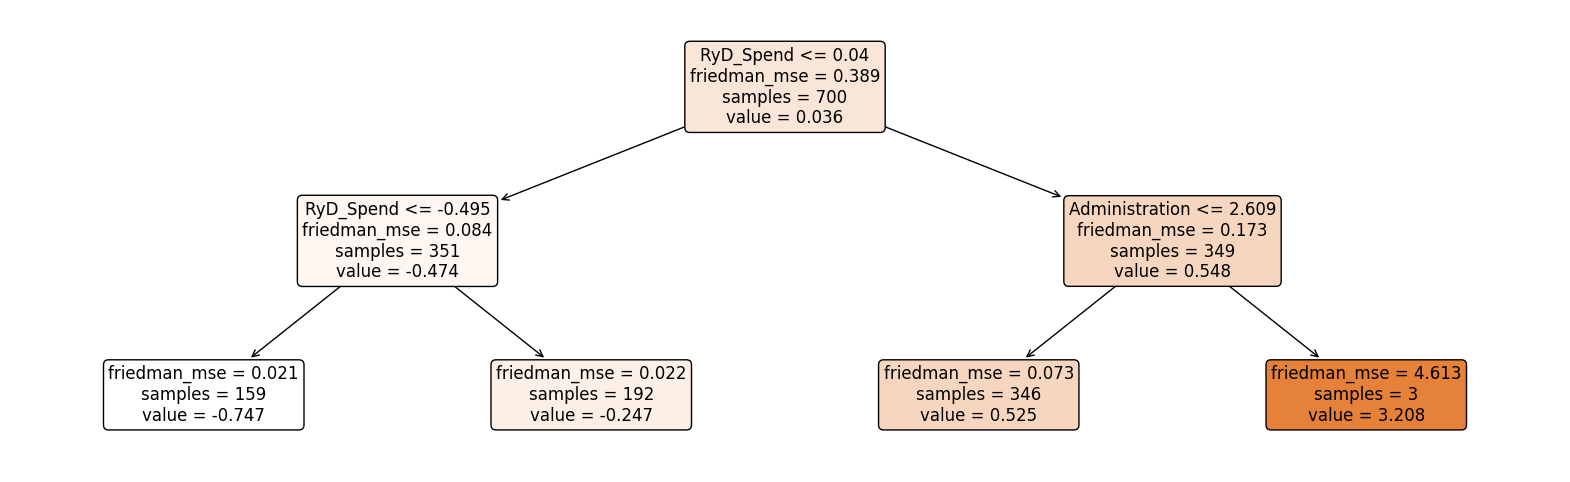

In [38]:
features = feature_list

plt.figure(figsize=(20,6))
tree.plot_tree(regressor_tree,
                feature_names=features,
                fontsize=12,
                filled=True,
                rounded=True)
plt.show()

### Pruebas variando los hiperparámetros

Text(0.5, 1.0, 'MSE segun distintos valores de max_depth')

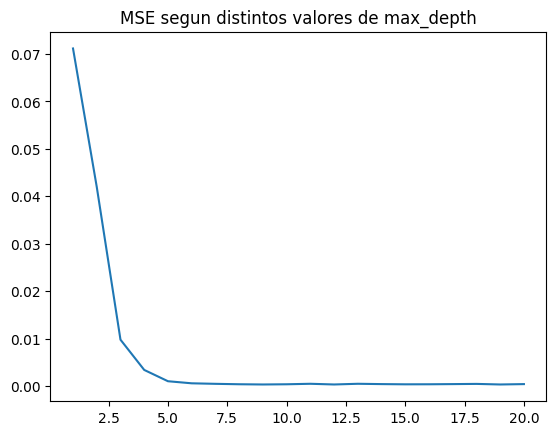

In [39]:
mse_max_depth = {}
for i in range(1,21):
    clf = tree.DecisionTreeRegressor(max_depth=i,min_samples_leaf=3, min_samples_split=5, criterion='friedman_mse')
    regressor_tree = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    mse_max_depth[i]=mean_squared_error(y_test, predictions)
plt.plot(mse_max_depth.keys(), mse_max_depth.values())
plt.title("MSE segun distintos valores de max_depth")

Text(0.5, 1.0, 'MSE según distintos valores de min_samples_leaf')

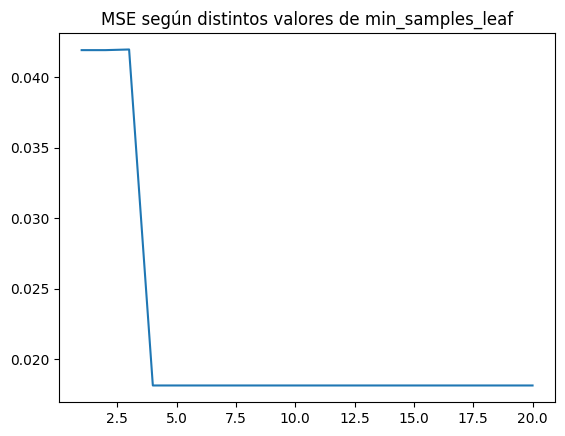

In [40]:
mse_min_samples_leaf = {}
for i in range(1,21):
    clf = tree.DecisionTreeRegressor(max_depth=2,min_samples_leaf=i, min_samples_split=5, criterion='friedman_mse')
    regressor_tree = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    mse_min_samples_leaf[i]=mean_squared_error(y_test, predictions)
plt.plot(mse_min_samples_leaf.keys(), mse_min_samples_leaf.values())
plt.title("MSE según distintos valores de min_samples_leaf")

Text(0.5, 1.0, 'MSE según distintos valores de min_samples_split')

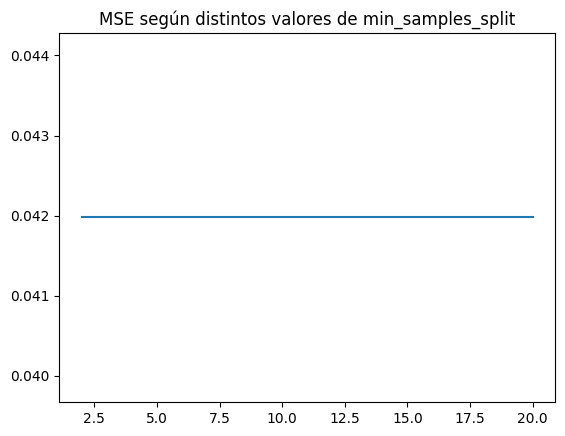

In [41]:
mse_min_samples_split = {}
for i in range(2, 21):
    clf = tree.DecisionTreeRegressor(max_depth=2,min_samples_leaf=3, min_samples_split=i, criterion='friedman_mse')
    regressor_tree = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    mse_min_samples_split[i]=mean_squared_error(y_test, predictions)

plt.plot(mse_min_samples_split.keys(), mse_min_samples_split.values())
plt.title("MSE según distintos valores de min_samples_split")

Text(0.5, 1.0, 'MSE según criterio utilizado')

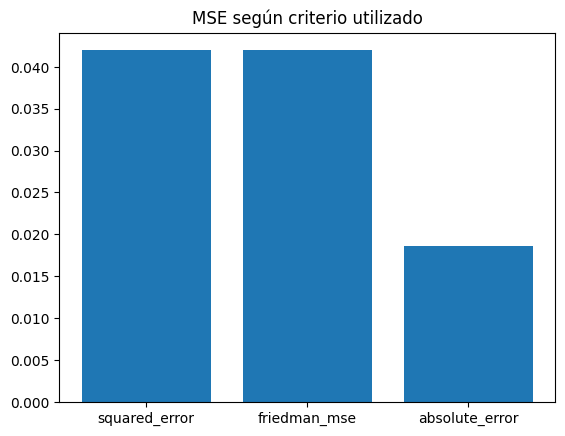

In [42]:
mse_criterion = {}
for i in ['squared_error', 'friedman_mse', 'absolute_error']:
    clf = tree.DecisionTreeRegressor(max_depth=2,min_samples_leaf=3, min_samples_split=5, criterion=i)
    regressor_tree = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    mse_criterion[i]=mean_squared_error(y_test, predictions)

plt.bar(mse_criterion.keys(), mse_criterion.values())
plt.title("MSE según criterio utilizado")

Notamos que evaluando los hiperparámetros por separado obtuvimos resultados muy distintos a los logrados con la optimización de hiperparámetros, sin embargo es posible que esto se deba a que para realizar estas evaluaciones individuales tuvimos que dejar fijos los demás hiperparámetros.

# Árbol de Decisión - Clasificación

In [43]:
pokemones = pd.read_csv('PokemonDB.csv')
pokemones

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1185,Chi-Yu,Dark,55,80,80,135,120,100
1186,Roaring Moon,Dragon,105,139,71,55,101,119
1187,Iron Valiant,Fairy,74,130,90,120,60,116
1188,Koraidon,Fighting,100,135,115,85,100,135


## Análisis Exploratorio

### Distribuciones de las variables

array([[<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Attack'}>],
       [<Axes: title={'center': 'Defense'}>,
        <Axes: title={'center': 'Sp. Atk'}>],
       [<Axes: title={'center': 'Sp. Def'}>,
        <Axes: title={'center': 'Speed'}>]], dtype=object)

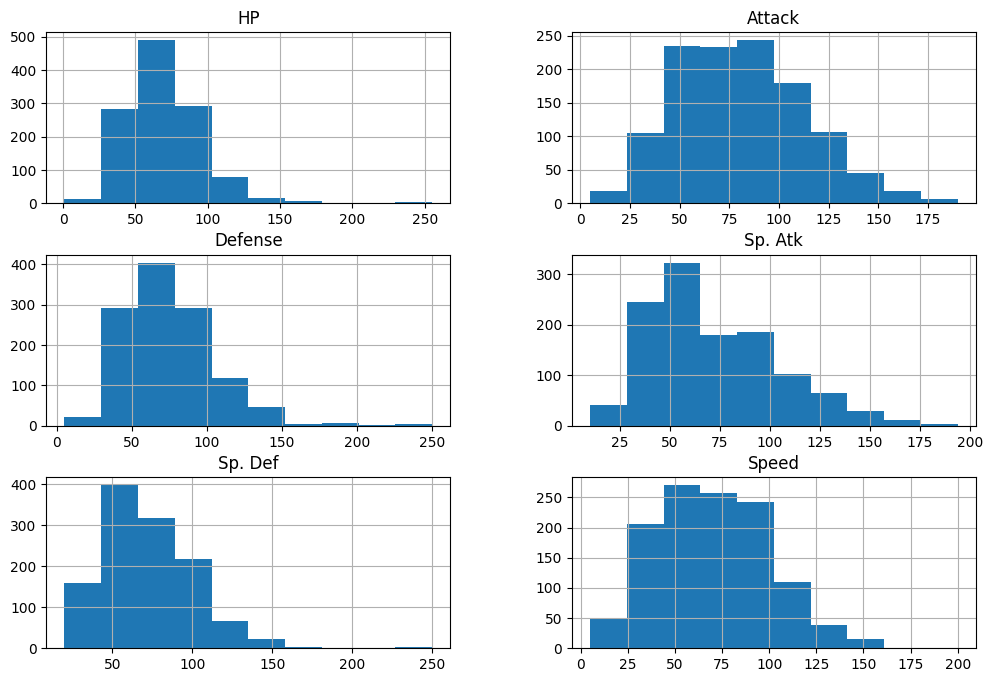

In [44]:
# Hacer gtrafico de densidad para cada numerica
pokemones.hist(figsize=(12,8))

### Valores nulos

In [45]:
pokemones.isnull().any()

Name       False
Type       False
HP         False
Attack     False
Defense    False
Sp. Atk    False
Sp. Def    False
Speed      False
dtype: bool

### Valores Atípicos

In [46]:
pokemones.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,70.852941,80.957983,74.586555,72.756303,72.050420,69.695798
std,26.886443,32.119650,30.718212,32.658636,27.637522,30.204376
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,51.250000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,70.000000,80.000000,70.000000,65.000000,70.000000,67.000000
75%,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


Observando los valores de las medianas de cada variable y sus valores máximos podemos ver fácilmente que el conjunto de datos posee valores atípicos. Para observarlo de una manera más fácil, lo visualizaremos.

<Axes: >

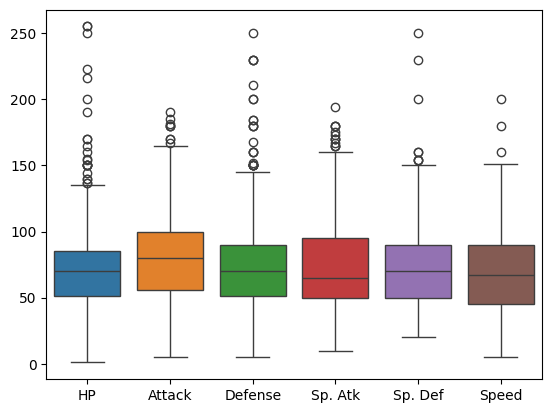

In [47]:
sns.boxplot(pokemones)

Esta información será tenida en cuenta a la hora de realizar un escalado de los datos.

### Tipos de Datos

In [48]:
pokemones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1190 non-null   object
 1   Type     1190 non-null   object
 2   HP       1190 non-null   int64 
 3   Attack   1190 non-null   int64 
 4   Defense  1190 non-null   int64 
 5   Sp. Atk  1190 non-null   int64 
 6   Sp. Def  1190 non-null   int64 
 7   Speed    1190 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 74.5+ KB


### Matriz de correlación

In [49]:
matrizCorrelacion = pokemones.drop(['Name','Type'], axis = 1).corr(method='spearman')
matrizCorrelacion

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.588420,0.476119,0.454221,0.488317,0.260462
Attack,0.588420,1.000000,0.527037,0.326323,0.326617,0.369541
Defense,0.476119,0.527037,1.000000,0.314865,0.594502,0.075910
Sp. Atk,0.454221,0.326323,0.314865,1.000000,0.575338,0.422457
Sp. Def,0.488317,0.326617,0.594502,0.575338,1.000000,0.274487
Speed,0.260462,0.369541,0.075910,0.422457,0.274487,1.000000


<Axes: >

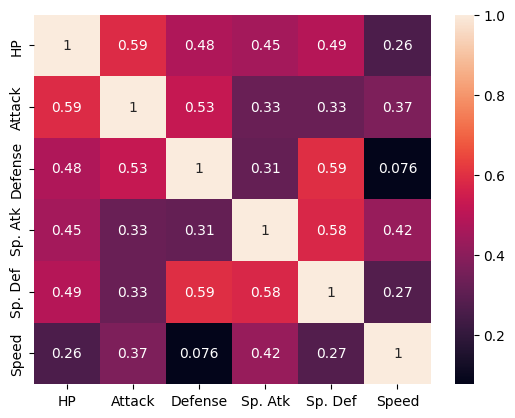

In [50]:
sns.heatmap(matrizCorrelacion, annot=True)

### Valores duplicados

In [51]:
pokemones[pokemones['Name']=='Geodude']

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
95,Geodude,Rock,40,80,100,30,30,20
96,Geodude,Rock,40,80,100,30,30,20


In [52]:
pokemones[pokemones.duplicated()]

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
96,Geodude,Rock,40,80,100,30,30,20
98,Graveler,Rock,55,95,115,45,45,35
100,Golem,Rock,80,120,130,55,65,45
119,Grimer,Poison,80,80,50,40,50,25
121,Muk,Poison,105,105,75,65,100,50
134,Voltorb,Electric,40,30,50,55,55,100
136,Electrode,Electric,60,50,70,80,80,150
148,Weezing,Poison,65,90,120,85,70,60
171,Tauros,Fighting,75,110,105,30,70,100
172,Tauros,Fighting,75,110,105,30,70,100


In [53]:
pokemones = pokemones.drop_duplicates()

### Balanceo del conjunto de datos

El conjunto de datos se encuentra desbalanceado. Esto puede afectar al modelo a la hora de clasificar. Para tener en cuenta este desbalanceo observaremos principalmente la métrica precision.

In [54]:
pokemones.Type.value_counts()

Type
Water       146
Normal      126
Grass       104
Bug          89
Psychic      81
Fire         75
Electric     65
Rock         63
Dark         56
Dragon       47
Ghost        47
Ground       46
Fighting     46
Ice          43
Steel        43
Poison       43
Fairy        31
Flying       10
Name: count, dtype: int64

## División del conjunto de datos

In [55]:
df = pokemones.drop('Name', axis=1)

In [56]:
df_train, df_temp = train_test_split(df, test_size=0.3)

In [57]:
df_val, df_test = train_test_split(df_temp, test_size=0.5)

In [58]:
pokemones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1161 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1161 non-null   object
 1   Type     1161 non-null   object
 2   HP       1161 non-null   int64 
 3   Attack   1161 non-null   int64 
 4   Defense  1161 non-null   int64 
 5   Sp. Atk  1161 non-null   int64 
 6   Sp. Def  1161 non-null   int64 
 7   Speed    1161 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 81.6+ KB


In [59]:
X_train = df_train.drop('Type', axis=1)
y_train = df_train.Type

X_val = df_val.drop('Type', axis=1)
y_val = df_val.Type

X_test = df_test.drop('Type', axis=1)
y_test = df_test.Type

# Escalado de los datos

Debido a la presencia de valores atípicos utilizaremos un escalado robusto.

In [60]:
escalador = RobustScaler()

def escalar(X):
       transformer = RobustScaler().fit(X)
       arr = transformer.transform(X)
       df = pd.DataFrame(arr, columns=X.columns)
       return df

In [61]:
X_train_escalado = escalar(X_train)
X_val_escalado = escalar(X_val)
X_test_escalado = escalar(X_test)



## Modelo base

In [62]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [63]:
modeloBase = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=2, random_state=130)

In [64]:
regressor_tree = modeloBase.fit(X_train, y_train)
predictionsVal = regressor_tree.predict(X_val)
predictionsTest = regressor_tree.predict(X_test)

In [65]:
precision_score(y_val, predictionsVal, average='weighted', zero_division=0)

0.04027621369141804

In [66]:
accuracy_score(y_val, predictionsVal)

0.13793103448275862

In [67]:
precision = precision_score(y_val, predictionsVal, average='weighted', zero_division=0)
precision

0.04027621369141804

In [68]:
print(f"Precisión Validación: {precision_score(y_val, predictionsVal, average='weighted', zero_division=0)}")
print(f"Precisión Test: {precision_score(y_test, predictionsTest, average='weighted', zero_division=0)}\n")

print("Recall Validación: ",recall_score(y_val, predictionsVal, average='weighted'))
print("Recall Test: ", recall_score(y_test, predictionsTest, average='weighted'),"\n")

print("Accuracy Validación: ", accuracy_score(y_val, predictionsVal))
print("Accuracy Test: ",accuracy_score(y_test, predictionsTest))

Precisión Validación: 0.04027621369141804
Precisión Test: 0.055448994934223006

Recall Validación:  0.13793103448275862
Recall Test:  0.15428571428571428 

Accuracy Validación:  0.13793103448275862
Accuracy Test:  0.15428571428571428


In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [70]:
confusionMatrixVal = confusion_matrix(y_val,predictionsVal)
confusionMatrixTest = confusion_matrix(y_test, predictionsTest)

<Figure size 1000x700 with 0 Axes>

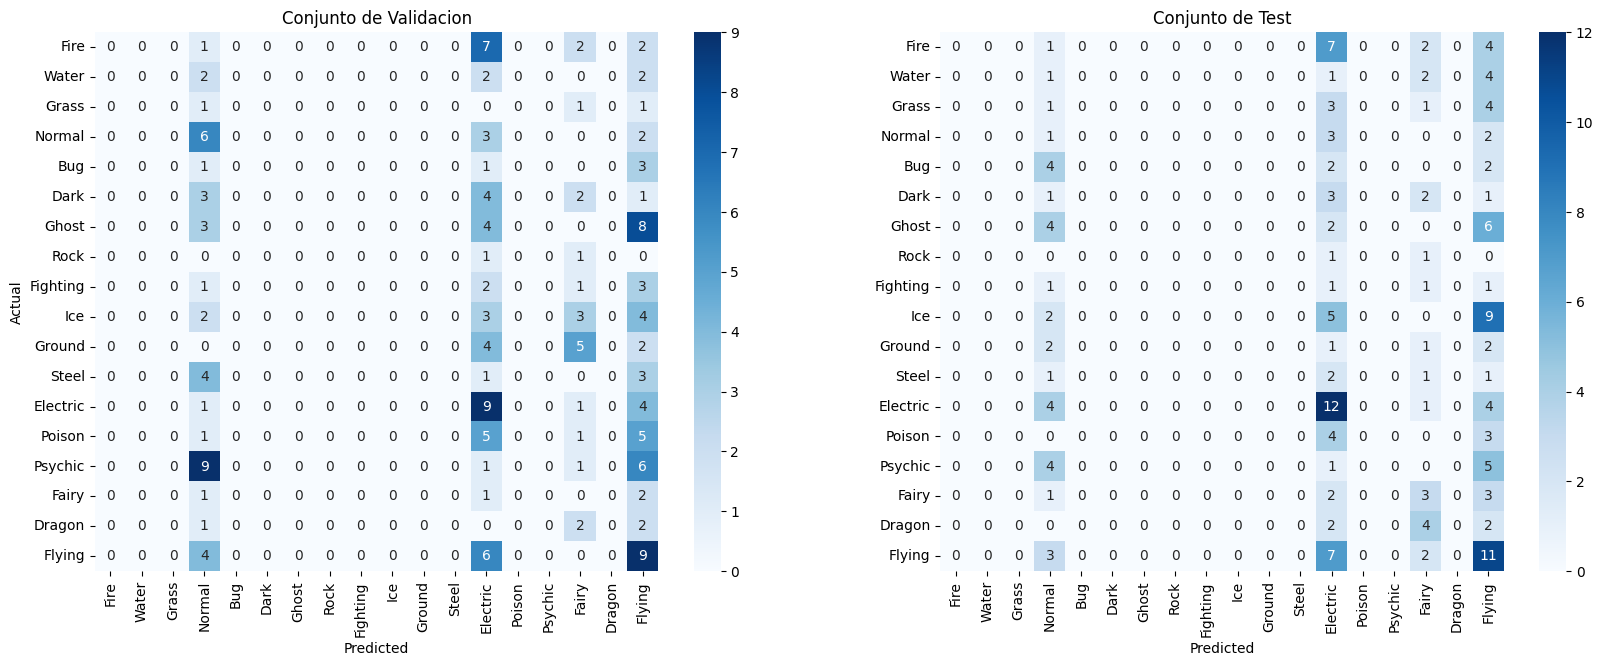

In [71]:
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots(1,2,figsize=(20, 7))

sns.heatmap(confusionMatrixVal, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique(), ax=ax[0])
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[0].set_title("Conjunto de Validacion")

sns.heatmap(confusionMatrixTest, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique(), ax=ax[1])
ax[1].set_xlabel('Predicted')
ax[1].set_title("Conjunto de Test")


#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix')
plt.show()

## Optimización de Hiperparámetros
Mediante la utilización de GridSearch

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'max_depth': [None, 5, 10, 15,20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Realizar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

In [73]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 20}


## Evaluación en validación y test

In [74]:
clf = DecisionTreeClassifier(criterion='gini', max_depth = 10, min_samples_leaf = 4, min_samples_split = 20)
regressor_tree = clf.fit(X_train, y_train)
predictionsVal = regressor_tree.predict(X_val)
predictionsTest = regressor_tree.predict(X_test)

In [75]:
print(f"Precisión Validación: {precision_score(y_val, predictionsVal, average='weighted', zero_division=0)}")
print(f"Precisión Test: {precision_score(y_test, predictionsTest, average='weighted', zero_division=0)}\n")

print("Recall Validación: ",recall_score(y_val, predictionsVal, average='weighted', zero_division=0))
print("Recall Test: ", recall_score(y_test, predictionsTest, average='weighted', zero_division=0),"\n")

print("Accuracy Validación: ", accuracy_score(y_val, predictionsVal))
print("Accuracy Test: ",accuracy_score(y_test, predictionsTest))

Precisión Validación: 0.18631852883243316
Precisión Test: 0.12775885900749784

Recall Validación:  0.15517241379310345
Recall Test:  0.14285714285714285 

Accuracy Validación:  0.15517241379310345
Accuracy Test:  0.14285714285714285


Al conservar resultados muy similares tanto en validación como en test, vemos que el modelo no está overfitteado.

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [77]:
confusionMatrixVal = confusion_matrix(y_val,predictionsVal, labels=y_train.unique())
confusionMatrixTest = confusion_matrix(y_test, predictionsTest, labels=y_train.unique())

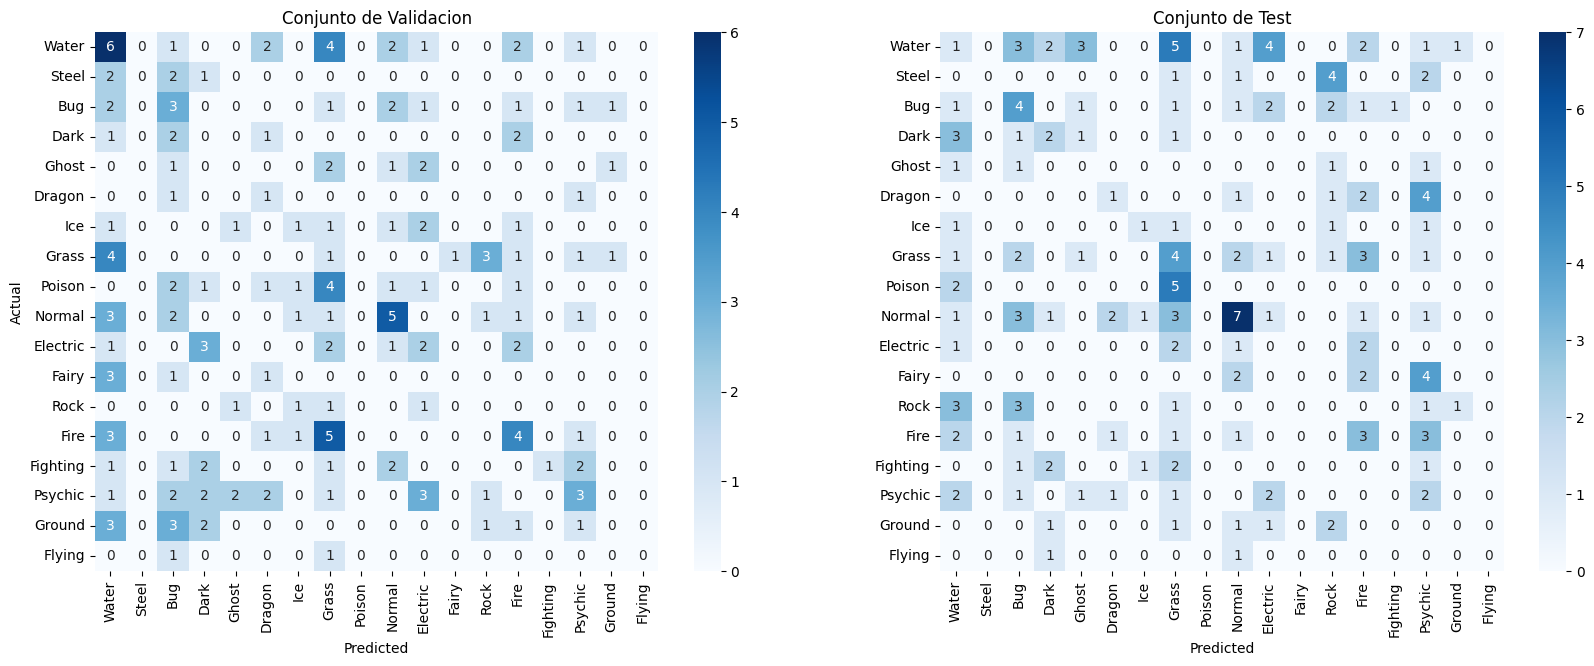

In [78]:
fig, ax = plt.subplots(1,2,figsize=(20, 7))

sns.heatmap(confusionMatrixVal, annot=True, fmt='d', cmap='Blues', xticklabels=y_train.unique(), yticklabels=y_train.unique(), ax=ax[0])
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[0].set_title("Conjunto de Validacion")

sns.heatmap(confusionMatrixTest, annot=True, fmt='d', cmap='Blues', xticklabels=y_train.unique(), yticklabels=y_train.unique(), ax=ax[1])
ax[1].set_xlabel('Predicted')
ax[1].set_title("Conjunto de Test")

plt.show()

Nuestro modelo sigue siendo deficiente incluso luego de haber optimizado los hiperparámetros.

Esto lo podemos ver visualmente al notar que en nuestro conjunto de validación la cantidad de clases bien clasificadas (la diagonal de la matriz) es prácticamente nula.
También podemos notar cómo el modelo es especialmente malo a la hora de clasificar Fairy y Flying. Como mostramos más abajo, esto se debe a que estas son las clases con menos cantidad de datos en nuestros dataset.

A su vez, si bien la precision del conjunto test del modelo base (0.08) fue mejorada (0.13), aun continúa siendo demasiado baja como para considerar a este un buen modelo de clasificación.

In [79]:
cantidadPorClase = pd.DataFrame()

In [80]:
#val = np.append(y_val.value_counts().values,0)

In [81]:
cantidadPorClase['Clase']=y_train.unique()
cantidadPorClase['Entrenamiento']= y_train.value_counts().values
cantidadPorClase['Validación']= y_val.value_counts().values
cantidadPorClase['Test']= y_test.value_counts().values

Abajo podemos observar la cantidad de pokemones de cada clase se hallaban en nuestro dataset, particularmente vemos que en el conjunto de test de Flying había un pokemón que no fue correctamente clasificado. La razón es que en el entrenamiento sólo se contaba con 8 ejemplos de esa clase.

In [82]:
cantidadPorClase

,Clase,Entrenamiento,Validación,Test
0,Water,104,19,23
1,Steel,90,17,21
2,Bug,76,15,16
3,Dark,63,15,14
4,Ghost,54,12,12
5,Dragon,50,12,10
6,Ice,48,12,9
7,Grass,48,11,9
8,Poison,42,11,8
9,Normal,36,10,8


## Visualizaicón

Para realizar la visualizacion reducimos la profundidad del árbol.

In [83]:
clf = DecisionTreeClassifier(criterion='gini', max_depth = 3, min_samples_leaf = 4, min_samples_split = 20)
regressor_tree = clf.fit(X_train, y_train)
predictionsVal = regressor_tree.predict(X_val)
predictionsTest = regressor_tree.predict(X_test)

In [84]:
print(f"Precisión Validación: {precision_score(y_val, predictionsVal, average='weighted', zero_division=0)}")
print(f"Precisión Test: {precision_score(y_test, predictionsTest, average='weighted', zero_division=0)}\n")

print("Recall Validación: ",recall_score(y_val, predictionsVal, average='weighted', zero_division=0))
print("Recall Test: ", recall_score(y_test, predictionsTest, average='weighted', zero_division=0),"\n")

print("Accuracy Validación: ", accuracy_score(y_val, predictionsVal))
print("Accuracy Test: ",accuracy_score(y_test, predictionsTest))

Precisión Validación: 0.10308797283911945
Precisión Test: 0.09481512605042015

Recall Validación:  0.14367816091954022
Recall Test:  0.17142857142857143 

Accuracy Validación:  0.14367816091954022
Accuracy Test:  0.17142857142857143


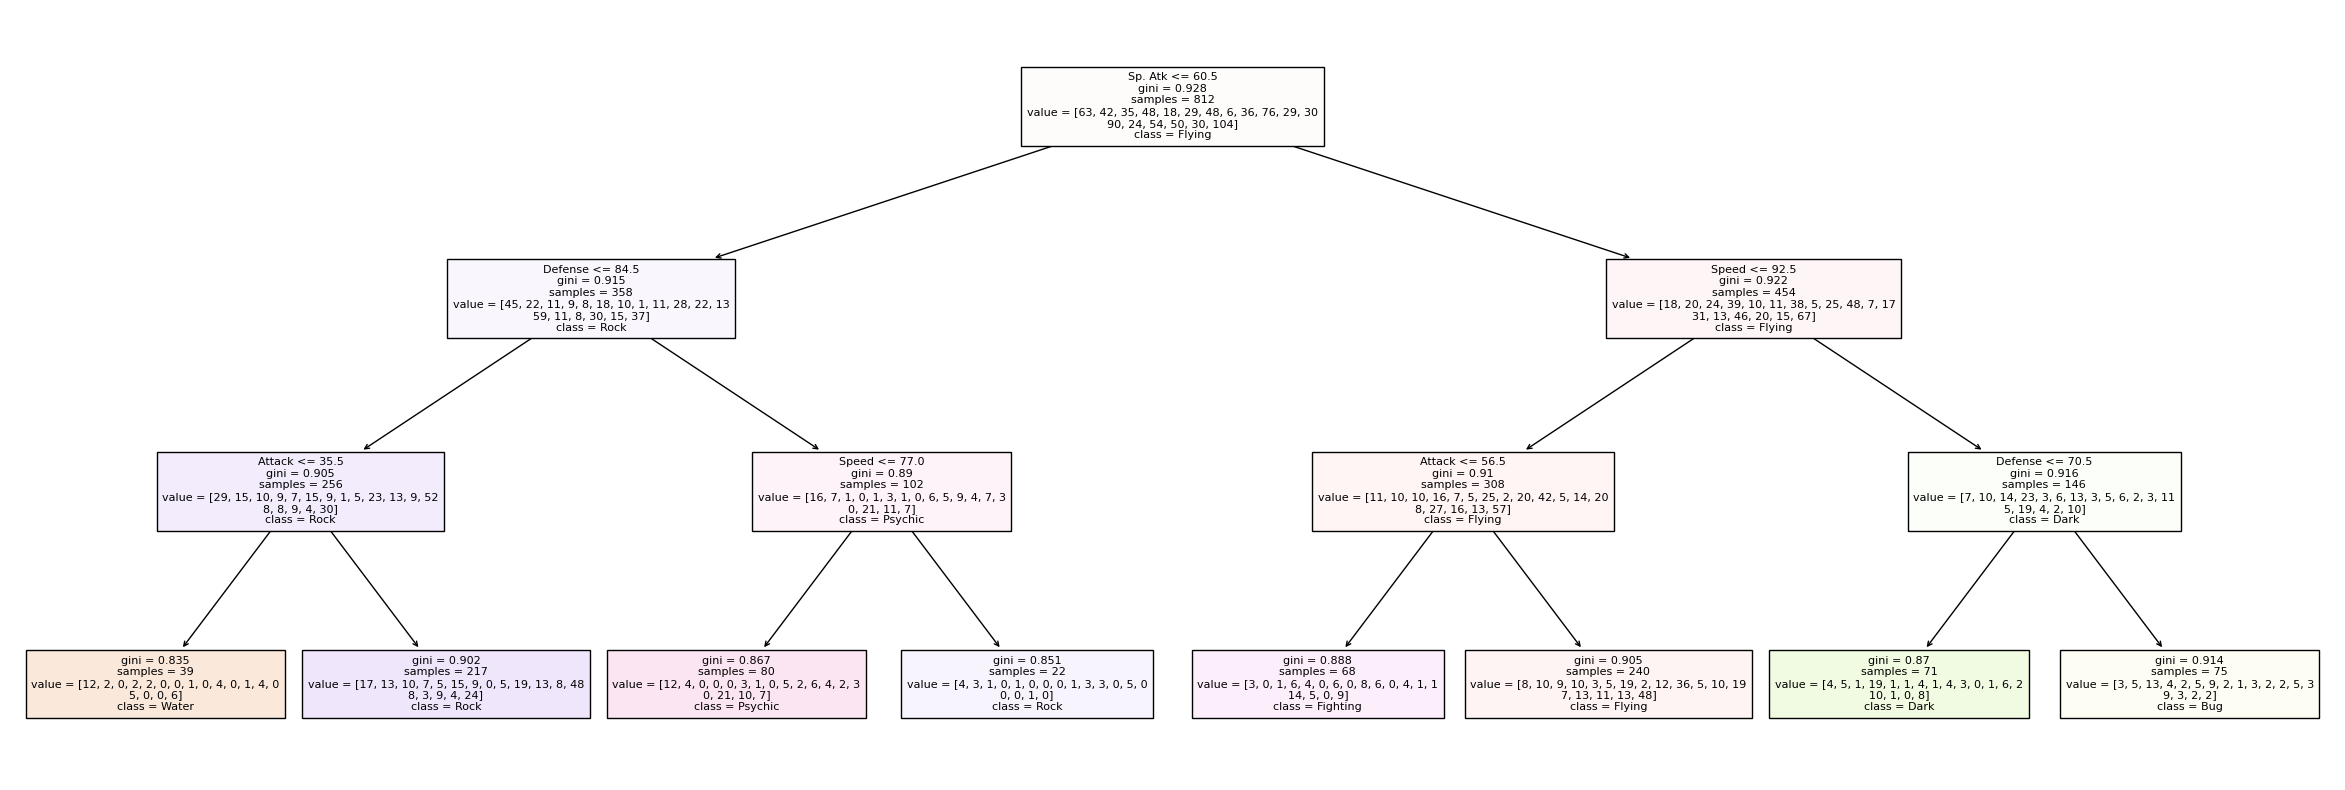

In [85]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Graficar el árbol entrenado
plt.figure(figsize=(30, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=y_train.unique(), fontsize = 8)
plt.show()


In [86]:
!pip install graphviz

In [87]:
from graphviz import Source
tree.export_graphviz(clf, out_file="pokemones.dot",
feature_names=X_train.columns,
class_names=y_train.unique(), rounded=True,
filled=True)

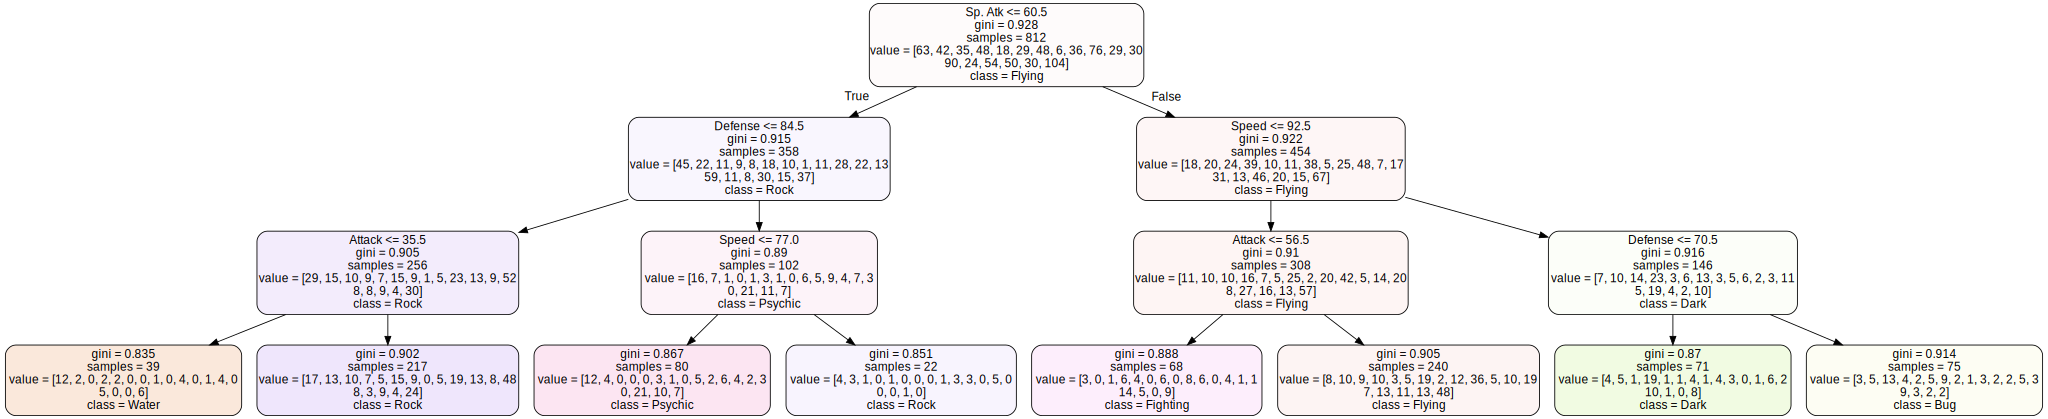

In [88]:
Source.from_file("pokemones.dot")

# Bayes Ingenuo - Clasificación

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

Modelo base

In [90]:
# Discretización de atributos
from sklearn.preprocessing import KBinsDiscretizer
column_names = X_train.columns.to_list()
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# x_train
X_train_discretized = pd.DataFrame(discretizer.fit_transform(X_train))
X_train_discretized.columns = column_names
#x_val
X_val_discretized = pd.DataFrame(discretizer.fit_transform(X_val))
X_val_discretized.columns = column_names
#x_test
X_test_discretized = pd.DataFrame(discretizer.transform(X_test))
X_test_discretized.columns = column_names

In [91]:
# Definición y Entrenamiento del Modelo
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(X_train_discretized, y_train)

GaussianNB()

In [92]:
X_train

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
212,65,80,80,59,63,58
94,80,70,65,80,120,100
1145,80,119,90,54,67,90
220,40,60,40,40,40,30
68,40,35,35,50,40,90
...,...,...,...,...,...,...
745,65,125,60,95,60,105
1128,70,100,115,35,55,75
556,74,100,72,90,72,46
588,75,75,130,75,130,95


In [93]:
X_train_escalado

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.099174,0.047337,0.270270,-0.142012,-0.183007,-0.177778
1,0.396694,-0.189349,-0.135135,0.355030,1.307190,0.755556
2,0.396694,0.970414,0.540541,-0.260355,-0.078431,0.533333
3,-0.925620,-0.426036,-0.810811,-0.591716,-0.784314,-0.800000
4,-0.925620,-1.017751,-0.945946,-0.355030,-0.784314,0.533333
...,...,...,...,...,...,...
807,-0.099174,1.112426,-0.270270,0.710059,-0.261438,0.866667
808,0.066116,0.520710,1.216216,-0.710059,-0.392157,0.200000
809,0.198347,0.520710,0.054054,0.591716,0.052288,-0.444444
810,0.231405,-0.071006,1.621622,0.236686,1.568627,0.644444


In [94]:
X_train_discretized

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1.0,2.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,2.0,2.0,2.0
2,1.0,3.0,1.0,1.0,1.0,2.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...
807,1.0,3.0,1.0,2.0,0.0,2.0
808,1.0,2.0,2.0,0.0,0.0,1.0
809,1.0,2.0,1.0,2.0,1.0,1.0
810,1.0,1.0,2.0,1.0,2.0,2.0


In [95]:
X_val_discretized

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,2.0,1.0,1.0,1.0,2.0
3,1.0,2.0,1.0,1.0,0.0,2.0
4,1.0,1.0,0.0,2.0,0.0,3.0
...,...,...,...,...,...,...
169,1.0,2.0,0.0,0.0,0.0,2.0
170,0.0,0.0,0.0,0.0,0.0,1.0
171,1.0,3.0,1.0,1.0,1.0,1.0
172,0.0,0.0,1.0,0.0,0.0,0.0


In [96]:
X_test_discretized

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1.0,1.0,1.0,3.0,1.0,2.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,3.0,2.0,3.0,2.0,3.0
4,1.0,3.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...
170,1.0,2.0,2.0,0.0,0.0,0.0
171,1.0,3.0,2.0,3.0,1.0,1.0
172,0.0,0.0,0.0,0.0,0.0,0.0
173,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
# Testeo
predictionsVal = model_GaussianNB.predict(X_val_discretized)
predictionsTest = model_GaussianNB.predict(X_test_discretized)

In [98]:
precision_GNB = precision_score(y_val, predictionsVal, average='weighted', zero_division=0)
precision_GNB

0.10687273341938658

In [99]:
accuracy_GNB = accuracy_score(y_val, predictionsVal)
accuracy_GNB

0.13218390804597702

In [100]:
recall_GNB = recall_score(y_val, predictionsVal, average='weighted', zero_division=0)
recall_GNB

0.13218390804597702

In [101]:
print(f"Precisión Validación: {precision_score(y_val, predictionsVal, average='weighted', zero_division=0)}")
print(f"Precisión Test: {precision_score(y_test, predictionsTest, average='weighted', zero_division=0)}\n")

print("Recall Validación: ",recall_score(y_val, predictionsVal, average='weighted'))
print("Recall Test: ", recall_score(y_test, predictionsTest, average='weighted'),"\n")

print("Accuracy Validación: ", accuracy_score(y_val, predictionsVal))
print("Accuracy Test: ",accuracy_score(y_test, predictionsTest))

Precisión Validación: 0.10687273341938658
Precisión Test: 0.16350551665083685

Recall Validación:  0.13218390804597702
Recall Test:  0.21142857142857144 

Accuracy Validación:  0.13218390804597702
Accuracy Test:  0.21142857142857144


In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [103]:
confusionMatrixVal = confusion_matrix(y_val,predictionsVal)
confusionMatrixTest = confusion_matrix(y_test, predictionsTest)

<Figure size 1000x700 with 0 Axes>

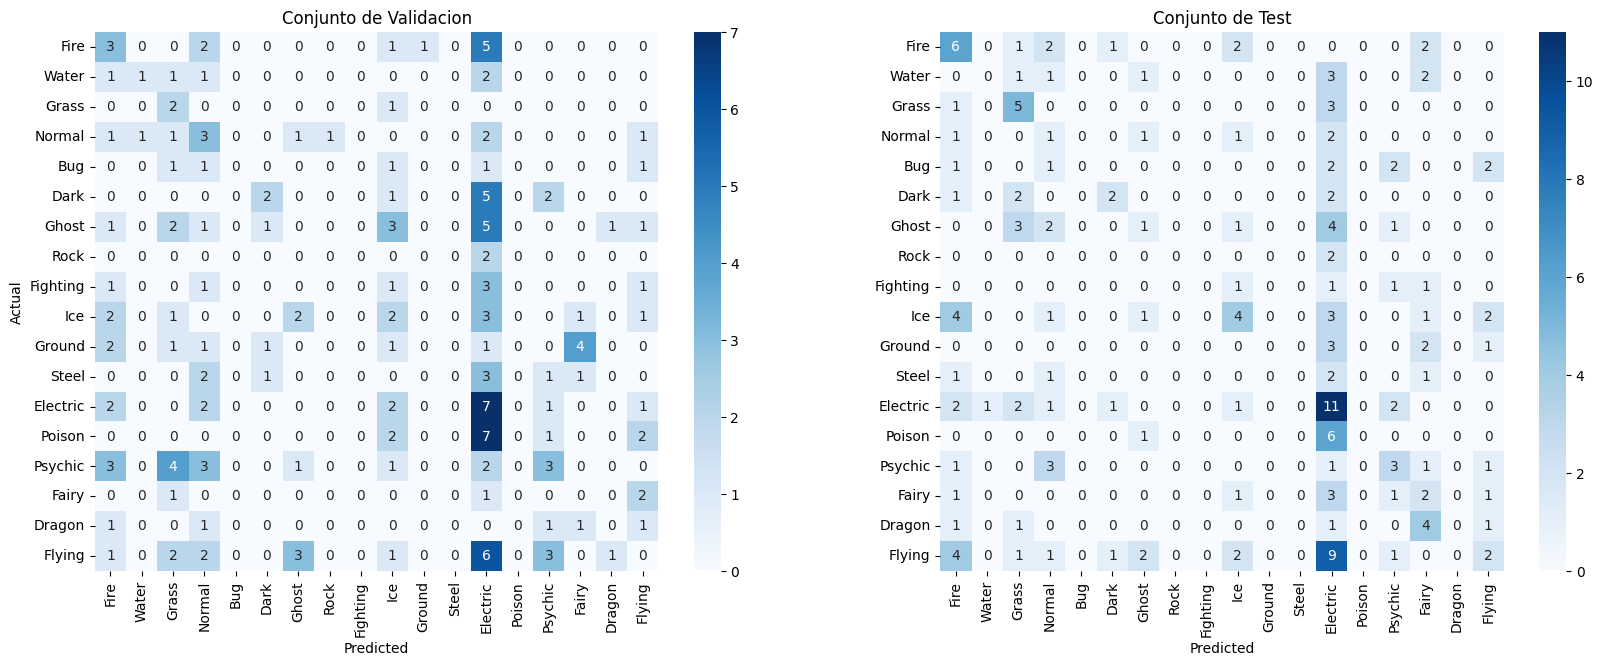

In [104]:
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots(1,2,figsize=(20, 7))

sns.heatmap(confusionMatrixVal, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique(), ax=ax[0])
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[0].set_title("Conjunto de Validacion")

sns.heatmap(confusionMatrixTest, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique(), ax=ax[1])
ax[1].set_xlabel('Predicted')
ax[1].set_title("Conjunto de Test")


#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix')
plt.show()

## Optimización de Hiperparámetros
Mediante la utilización de GridSearch

In [105]:
import numpy as np

clases, frecuencias = np.unique(y_train, return_counts=True)
probabilidades = frecuencias / len(y_train)

# for clase, probabilidad in zip(clases, probabilidades):
#     print(f"Clase {clase}: Probabilidad {probabilidad:.2f}")

In [106]:
from sklearn.model_selection import GridSearchCV

model_GaussianNB = GaussianNB()
param_grid = {
    'priors': [None, probabilidades],
    'var_smoothing': [1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]
}

grid_search = GridSearchCV(model_GaussianNB, param_grid, cv=3)

grid_search.fit(X_train_discretized, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'priors': [None,
                                    array([0.07758621, 0.05172414, 0.04310345, 0.0591133 , 0.02216749,
       0.03571429, 0.0591133 , 0.00738916, 0.04433498, 0.09359606,
       0.03571429, 0.03694581, 0.11083744, 0.02955665, 0.06650246,
       0.06157635, 0.03694581, 0.12807882])],
                         'var_smoothing': [1e-06, 1e-07, 1e-08, 1e-09, 1e-10,
                                           1e-11, 1e-12]})

In [107]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'priors': None, 'var_smoothing': 1e-06}


Evaluación en validación y test

In [108]:
# Definición y Entrenamiento del Modelo
model_GaussianNB = GaussianNB(priors=probabilidades, var_smoothing=1e-06)
model_GaussianNB.fit(X_train_discretized, y_train)
# Testeo
predictionsVal = model_GaussianNB.predict(X_val_discretized)
predictionsTest = model_GaussianNB.predict(X_test_discretized)

In [109]:
print(f"Precisión Validación: {precision_score(y_val, predictionsVal, average='weighted', zero_division=0)}")
print(f"Precisión Test: {precision_score(y_test, predictionsTest, average='weighted', zero_division=0)}\n")

print("Recall Validación: ",recall_score(y_val, predictionsVal, average='weighted'))
print("Recall Test: ", recall_score(y_test, predictionsTest, average='weighted'),"\n")

print("Accuracy Validación: ", accuracy_score(y_val, predictionsVal))
print("Accuracy Test: ",accuracy_score(y_test, predictionsTest))

Precisión Validación: 0.10687273341938658
Precisión Test: 0.16350551665083685

Recall Validación:  0.13218390804597702
Recall Test:  0.21142857142857144 

Accuracy Validación:  0.13218390804597702
Accuracy Test:  0.21142857142857144


### Conclusiones
#### Exactitud
Tenemos un Accuracy muy bajo, lo que indica que el modelo clasifica la mayoria de instancias de forma incorrecta, no aprende efectivamente los datos.
#### Exhaustividad
Los valores son muy bajos, existen dificultades en el modelo para aprender y encontrar las instancias de clase correctas.
#### Precisión
Las puntuaciones tanto para el conjunto de validacion como para el de prueba son muy bajas, por lo que podemos concluir que al modelo le cuesta distinguir de forma correcta entre las clases.
Quiza esto se de por un desequilibrio de clases y sea conveniente aplicar alguna tecnica de balanceo.

# K-NN

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsClassifier

## Modelo base

In [ ]:
X_train

In [126]:
knn_model = KNeighborsClassifier(n_neighbors=3)
# Entrenar el modelo
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Evaluación en validación y test

In [127]:
# Testeo
predictionsVal = knn_model.predict(X_val)
predictionsTest = knn_model.predict(X_test)

In [128]:
print(f"Precisión Validación: {precision_score(y_val, predictionsVal, average='weighted', zero_division=0)}")
print(f"Precisión Test: {precision_score(y_test, predictionsTest, average='weighted', zero_division=0)}\n")

print("Recall Validación: ",recall_score(y_val, predictionsVal, average='weighted'))
print("Recall Test: ", recall_score(y_test, predictionsTest, average='weighted'),"\n")

print("Accuracy Validación: ", accuracy_score(y_val, predictionsVal))
print("Accuracy Test: ",accuracy_score(y_test, predictionsTest))

Precisión Validación: 0.12293242118824466
Precisión Test: 0.13796340758525633

Recall Validación:  0.1206896551724138
Recall Test:  0.15428571428571428 

Accuracy Validación:  0.1206896551724138
Accuracy Test:  0.15428571428571428


In [129]:
# Realizar predicciones en el conjunto de prueba
predictions = knn_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy:.2f}')

# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(y_test, predictions))

Precisión del modelo: 0.15

Informe de Clasificación:
              precision    recall  f1-score   support

         Bug       0.30      0.57      0.39        14
        Dark       0.06      0.12      0.08         8
      Dragon       0.18      0.22      0.20         9
    Electric       0.06      0.17      0.09         6
       Fairy       0.09      0.12      0.11         8
    Fighting       0.33      0.14      0.20         7
        Fire       0.14      0.25      0.18        12
      Flying       0.00      0.00      0.00         2
       Ghost       0.14      0.25      0.18         4
       Grass       0.12      0.12      0.12        16
      Ground       0.00      0.00      0.00         6
         Ice       0.17      0.20      0.18         5
      Normal       0.25      0.19      0.22        21
      Poison       0.00      0.00      0.00         7
     Psychic       0.20      0.10      0.13        10
        Rock       0.25      0.11      0.15         9
       Steel       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
X_train

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
212,65,80,80,59,63,58
94,80,70,65,80,120,100
1145,80,119,90,54,67,90
220,40,60,40,40,40,30
68,40,35,35,50,40,90
...,...,...,...,...,...,...
745,65,125,60,95,60,105
1128,70,100,115,35,55,75
556,74,100,72,90,72,46
588,75,75,130,75,130,95


La raiz cuadrada del total de datos para entrenar (812) es 28.49.
Esto lo usamos como valor de partida para definir el rango de K.
Usamos el 29 y vamos incrementando de a 2 para que sean numeros impares y asi minimizar la posibilidad de empates en el momento de decidir la clase de una nueva instancia.

In [136]:
# Inicializar el clasificador KNN
knn_model_GSCV = KNeighborsClassifier()

# Definir los parámetros a ajustar
parametros_grid = {'n_neighbors':  range(29, 45, 2),
                   'p':[1,2],
                   'weights': ['uniform', 'distance'] }

# Inicializar el objeto GridSearchCV
grid_search = GridSearchCV(estimator = knn_model_GSCV,
                           param_grid = parametros_grid,
                           cv=5,
                           scoring='accuracy')

In [137]:
# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener el mejor modelo entrenado
mejor_modelo = grid_search.best_estimator_

Mejores hiperparámetros: {'n_neighbors': 31, 'p': 2, 'weights': 'uniform'}


In [141]:
knn_model = KNeighborsClassifier(n_neighbors=31, p=2, weights='uniform')
# Entrenar el modelo
knn_model.fit(X_train_escalado, y_train)
# Testeo
predictionsVal = model_GaussianNB.predict(X_val_escalado)
predictionsTest = model_GaussianNB.predict(X_test_escalado)

In [142]:
# Realizar predicciones en el conjunto de prueba
pred = mejor_modelo.predict(X_test)

# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(y_test, pred))


Informe de Clasificación:
              precision    recall  f1-score   support

         Bug       0.46      0.43      0.44        14
        Dark       0.00      0.00      0.00         8
      Dragon       0.27      0.33      0.30         9
    Electric       0.00      0.00      0.00         6
       Fairy       0.00      0.00      0.00         8
    Fighting       0.50      0.14      0.22         7
        Fire       0.35      0.50      0.41        12
      Flying       0.00      0.00      0.00         2
       Ghost       0.00      0.00      0.00         4
       Grass       0.29      0.44      0.35        16
      Ground       0.00      0.00      0.00         6
         Ice       0.00      0.00      0.00         5
      Normal       0.29      0.52      0.37        21
      Poison       0.00      0.00      0.00         7
     Psychic       0.12      0.10      0.11        10
        Rock       0.13      0.22      0.17         9
       Steel       0.00      0.00      0.00         8


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Encontramos que la exactitud del modelo es bastante baja, por lo que podemos concluir que tiene dificultades para clasificar correctamente cada clase en general.

La precisión promedio, recall promedio y F1-score promedio para todas las clases son alrededor de 0.15 a 0.17 lo que indica un rendimiento general bajo en la clasificación de todas las clases.

De acuerdo a las metricas obtenidas podemos observar que en algunas clases como lo son **Bug** o **Fighting** tiene una precisión razonable y un recall moderado, por lo que podemos decir que el modelo puede identificar correctamente algunos ejemplos de estas clases.

Por otro lado, clases como **Ghost**, **Electric**, **Poison**, entre otras, la precisión, recall y F1-score son 0, con esto vemos que el modelo no predijo correctamente ninguna muestra de estas clases.